In [1]:

import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

X, y = data, target
bnb = BernoulliNB()



In [3]:
sms_raw['spam'].value_counts()

False    4825
True      747
Name: spam, dtype: int64

In [4]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(X, y).score(X, y)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


(5014, 8) (558, 8) (5014,) (558,)
(4457, 8) (1115, 8) (4457,) (1115,)
(3900, 8) (1672, 8) (3900,) (1672,)
(3343, 8) (2229, 8) (3343,) (2229,)
(2786, 8) (2786, 8) (2786,) (2786,)
(2228, 8) (3344, 8) (2228,) (3344,)
(1671, 8) (3901, 8) (1671,) (3901,)
(1114, 8) (4458, 8) (1114,) (4458,)
(557, 8) (5015, 8) (557,) (5015,)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


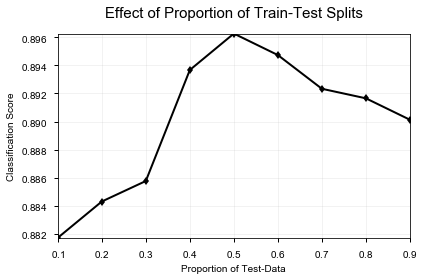

0.8907025372352657
0.8912416270711448
0.8912412517001425
0.8912411944191738
0.8915987306458465
0.8915998621590095
0.891598174227193
0.8916002223496101
0.8915974407593865


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


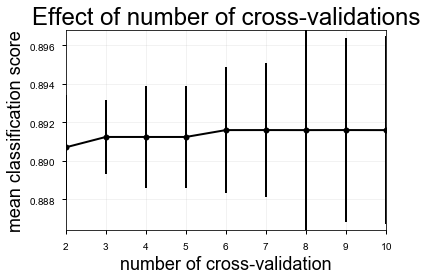

In [5]:
#""" The effect of train-test split sizes"""
test_sizes = [0.1 * i for i in range(1, 10)]
scores = []
for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=20)
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        clf = bnb.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(test_sizes, scores, 'k-d')
ax.set_title("Effect of Proportion of Train-Test Splits", y=1.05,size=15)
ax.set_ylabel(r"Classification Score", labelpad=5, size=10)
ax.set_xlabel(r"Proportion of Test-Data" , labelpad=5, size=10)
#plt.savefig('train-test-splits.png')
plt.tight_layout()
plt.show()

#""" The effect of number of cross-validations """
cvs = [i for i in range(2, 11)]
cv_scores_means = []
cv_scores_std = []

for cv in cvs:
    clf = bnb.fit(X_train, y_train)    
    scores = cross_val_score(clf, X, y, cv=cv)
    cv_scores_means.append(scores.mean())
    print(str(scores.mean()))
    cv_scores_std.append(scores.std())

fig, ax = plt.subplots()
ax.errorbar(cvs, cv_scores_means, yerr=cv_scores_std, fmt='k-o')
ax.set_title('Effect of number of cross-validations')
ax.set_xlabel('number of cross-validation')
ax.set_ylabel('mean classification score')
#plt.savefig('number-of-cv.png')
plt.tight_layout()
plt.show()

In [6]:
#Cross validation
cross_val_score(bnb, data, target, cv=5)

array([0.8941704 , 0.89237668, 0.89317774, 0.88689408, 0.88958707])

In [7]:
print(bnb)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [8]:
y_pred = bnb.fit(data, target).predict(data)

In [9]:
# Calculate the accuracy of your model here.
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
accuracy = (1-(target != y_pred).sum()/data.shape[0])*100
print("accuracy {:0.2f}".format(accuracy))


Number of mislabeled points out of a total 5572 points : 604
accuracy 89.16


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


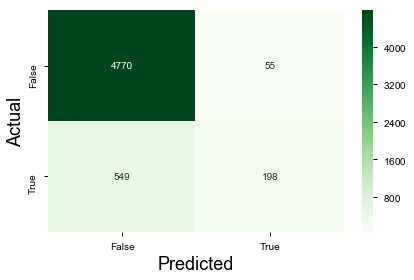

In [11]:

y_actu = pd.Series(target, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
sns.heatmap(df_confusion,annot=True,cmap="Greens",fmt='g')


In [12]:

tn = df_confusion.iloc[0,0] #198
fp = df_confusion.iloc[0,1] #55
fn = df_confusion.iloc[1,0] #549
tp = df_confusion.iloc[1,1] #4770

sensitivity= tp/(tp+fn) #true pos/(total actual pos) -> 198/(198+549)
specificity = tn/(tn+fp) #true neg/(total actual neg) -> 4770/(4770+55)

print("tp {}".format(tp))
print("fp {}".format(fp))
print("fn {}".format(fn))
print("tn {}".format(tn))

print(r"sensitivity-ability to select positives-spams {:0.2f}".format(sensitivity)) #27 percent, bad at selecting ham
print("specificity-ability to select negatives-hams  {:0.2f}".format(specificity)) #99 percent, 

tp 198
fp 55
fn 549
tn 4770
sensitivity-ability to select positives-spams 0.27
specificity-ability to select negatives-hams  0.99


## END
